## Molecule Search

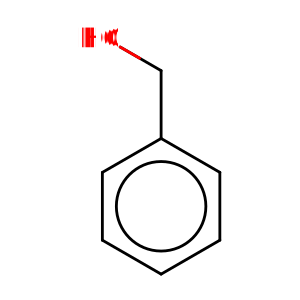

In [13]:
from chemaxon import import_mol, MoleculeSearch, SearchType, Standardizer

query = import_mol('C1=CC=CC=C1')
target = import_mol('OCc1ccccc1')
target

Hit indexes

In [ ]:
substructure_search = MoleculeSearch()
hit = substructure_search.find_hit(query, target)
hit.hit_indexes

Duplicate search, setting search options

In [ ]:
duplicate_search = MoleculeSearch(search_type=SearchType.DUPLICATE)
hit = duplicate_search.find_hit(query, target)
hit is None

Hit coloring

In [ ]:
q = import_mol('CCCCCC')
t = import_mol('C1CCCCC1Cl')
MoleculeSearch().find_hit(q, t, return_colored_hit=True).colored_mol

Setting standardizer

In [ ]:
basic_arom_search = MoleculeSearch(standardizer=Standardizer('aromatize:b'))
q_basic = import_mol('CC')
t_basic = import_mol('O=C1NC=CC=C1')
t_basic

In [ ]:
basic_arom_search.find_hit(q_basic,t_basic, return_colored_hit=True).colored_mol

No standardizer

In [ ]:
search_no_st = MoleculeSearch(standardizer="")
search_no_st.find_hit(import_mol('c1ccccc1'), import_mol('c1ccccc1CC'), True).colored_mol

In [ ]:
search_no_st = MoleculeSearch(standardizer=None)
search_no_st.find_hit(import_mol('c1ccccc1'), import_mol('C1=CC=CC=C1'), True) is None

Bulk Search

In [14]:
bulk_search = MoleculeSearch()

query = import_mol('C1=CC=CC=C1')
targets = [import_mol('OCc1ccccc1'), import_mol('CC'), import_mol('c1ccccc1')]
hits = bulk_search.find_hits_in_list(query, targets)
hits

 None,

In [15]:
[hit.hit_indexes if hit is not None else hit for hit in hits]

[[2, 3, 4, 5, 6, 7], None, [0, 1, 2, 3, 4, 5]]

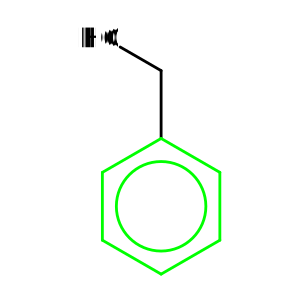

In [20]:
from chemaxon import export_mol
colored_hits = bulk_search.find_hits_in_list(query, targets, return_colored_hit=True)
colored_hits[0].colored_mol

Bulk search speed

In [21]:
import time 
start = time.time()
hits = bulk_search.find_hits_in_list(query, targets*5000)
time.time()-start

0.2367076873779297

In [22]:
substructure_search = MoleculeSearch()
start = time.time()
hits = [substructure_search.find_hit(query, t) for  t in targets*5000 ]
time.time()-start

1.2248260974884033